# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [1]:
# mc rin

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
from numpy.polynomial import Polynomial as P

data_train = np.loadtxt('/Users/rinatgorbachev/Desktop/train.txt', delimiter=',')
data_test = np.loadtxt('/Users/rinatgorbachev/Desktop/test.txt', delimiter=',')

ImportError: No module named pyparsing

Разделим значения $x$ и $y$

In [26]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [27]:
n = X_train.shape[0]
# numpy.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
X_matrix = np.array(X_train, ndmin=2).T

matrix_of_nuls = np.array(np.ones(n), ndmin=2).T
# numpy.concatenate((a1, a2, ...), axis=0, out=None)
X = np.concatenate((X_matrix, matrix_of_nuls), axis=1, out=None)
# a' = X(X^T*X)^(-1)*X^T*Y
Answer = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)

print('k = {}'.format(Answer[0]))
print('b = {}'.format(Answer[1]))

k = 2.27913449805195
b = 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

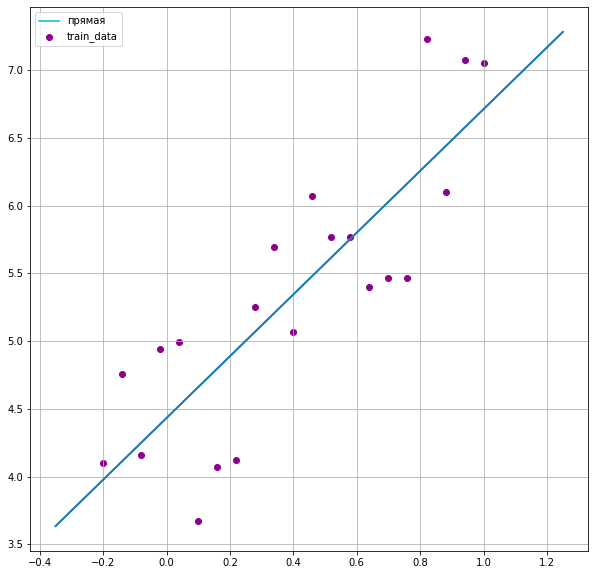

In [28]:
plt.figure(figsize=(10, 10))
plt.grid()

plt.scatter(X_train, y_train, color='darkmagenta', label='train_data')

def draw_points(num):
    return (Answer[0] * num) + Answer[1]
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

x_1 = np.linspace(-0.35, 1.25)  # прямая

y_1 = [draw_points(i) for i in x_1]

plt.plot(x_1, y_1, color='c', label='прямая')

plt.plot(x_1, y_1,linestyle = '-',linewidth = 2,)

plt.legend()

plt.show()

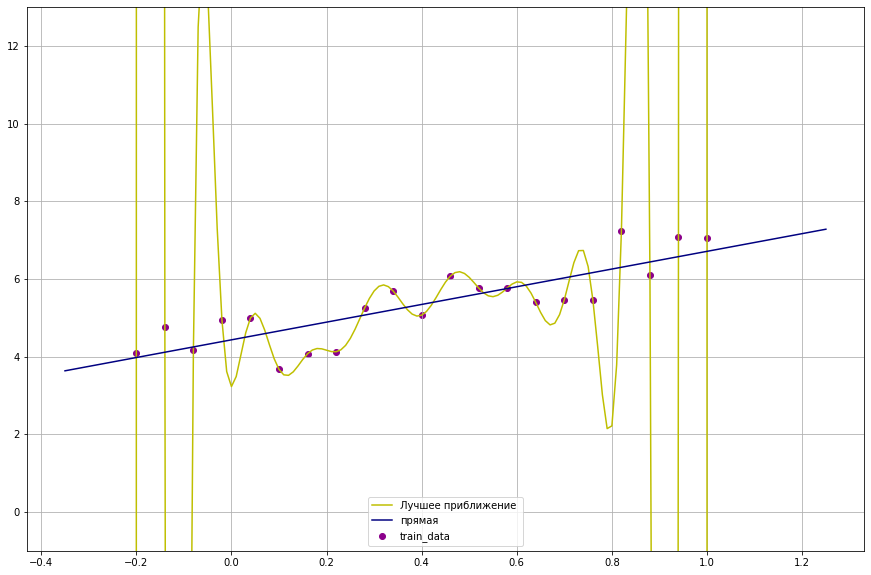

In [29]:
# Идеальным приближением будет многочлен степени n-1, как в начале файла.
# Лучшее приближение многочленом степени n-1

k = n - 1
pol_max = []
X = np.array(X_train**k, ndmin=2).T

for i in range(k - 1, -1, -1):
    pol_c = np.array(X_train**i, ndmin=2).T
    X = np.concatenate((X, pol_c), axis=1, out=None)

plt.figure(figsize=(15, 10))
plt.ylim(-1, 13)

x_points = np.arange(-0.3, 1.10, 0.01)
coef = np.linalg.solve(X, np.array(y_train, ndmin=2).T)

for x in x_points:
    pol_c = 0
    temp = 0
    for i in range(k + 1):
        temp = (x ** (k - i))
        pol_c += temp * coef[i] 
    pol_max.append(pol_c)

plt.scatter(X_train, y_train, color='darkmagenta', label='train_data')

plt.plot(x_points, pol_max, color='y', label='Лучшее приближение ')

x_1 = np.linspace(-0.35, 1.25)
y_1 = [draw_points(i) for i in x_1]

plt.plot(x_1, y_1, color='navy', label='прямая')

plt.legend()
plt.grid()
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [30]:
# Для  𝑘=1,2,3,…,10

for k in range(1, 11):
    X = np.array(X_train**k, ndmin=2).T
    for i in range(k - 1, -1, -1):
        pol_c = np.array(X_train**i, ndmin=2).T
        X = np.concatenate((X, pol_c), axis=1, out=None)
        
    coef = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)  # для устранения погрешности
    
    train_fault = 0
    for i in range(n):
        x = X_train[i]
        y = y_train[i]
        pol_c = 0
        temp = 0
        for j in range(k + 1):
            temp = (x ** (k - j))
            pol_c += coef[j] * temp
        train_fault += (pol_c - y) ** 2
    train_fault *= (1/n)
    
    test_fault = 0
    for i in range(n):
        x = X_test[i]
        y = y_test[i]
        pol_c = 0
        temp = 0
        for j in range(k + 1):
            temp = (x ** (k - j))
            pol_c += coef[j] * temp
        test_fault += (pol_c - y) ** 2
    test_fault *= (1/n)

    print('Степень {}'.format(k))
    print(' ошибка на обучающих данных {}'.format(train_fault))
    print(' ошибка на тестовых данных {}'.format(test_fault))

Степень 1
 ошибка на обучающих данных 0.2968966332625195
 ошибка на тестовых данных 0.43512020040488836
Степень 2
 ошибка на обучающих данных 0.2696989158766915
 ошибка на тестовых данных 0.35647628878312126
Степень 3
 ошибка на обучающих данных 0.26949718714796106
 ошибка на тестовых данных 0.35534645715184526
Степень 4
 ошибка на обучающих данных 0.26106653305792743
 ошибка на тестовых данных 0.44172701892835486
Степень 5
 ошибка на обучающих данных 0.2499850464831754
 ошибка на тестовых данных 0.5579732021834226
Степень 6
 ошибка на обучающих данных 0.1882934898836989
 ошибка на тестовых данных 2.581692932354831
Степень 7
 ошибка на обучающих данных 0.18539621153294333
 ошибка на тестовых данных 2.515782894960881
Степень 8
 ошибка на обучающих данных 0.15905556579083568
 ошибка на тестовых данных 4.3572883679898595
Степень 9
 ошибка на обучающих данных 0.15847184274729642
 ошибка на тестовых данных 4.776344642231365
Степень 10
 ошибка на обучающих данных 0.15316611256471302
 ошибка 

1:
[2.2791345  4.43323091]
2:
[1.40162851 1.15783169 4.4724765 ]
3:
[-0.3817686   1.85975084  1.06501611  4.46073636]
4:
[  7.9184747  -13.05132812   6.79409178   1.17180239   4.34116612]
6:
[-229.9701334   581.45329821 -481.51013286  121.25709712   16.00290399
   -4.59717932    4.38379501]


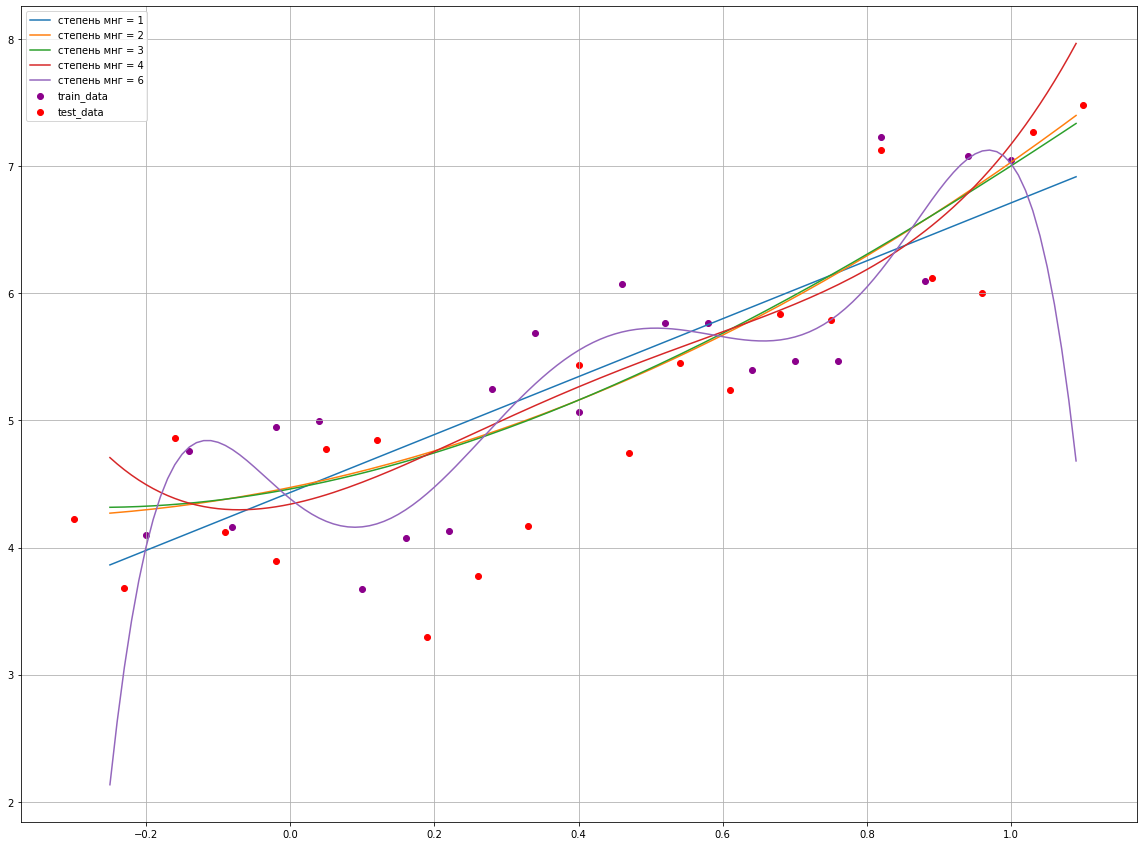

In [31]:
# Для  𝑘=1,2,3,4,6

plt.figure(figsize=(20, 15))
plt.scatter(X_train, y_train, color='darkmagenta', label='train_data')
plt.scatter(X_test, y_test, color='red', label='test_data')

x_points = np.arange(-0.25, 1.1, 0.01)

for k in (1,2,3,4,6):
    X = np.array(X_train ** k, ndmin=2).T
    for i in range(k - 1, -1, -1):
        pol_c = np.array(X_train ** i, ndmin=2).T
        X = np.concatenate((X, pol_c), axis=1, out=None)
    
    res = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)
    print('{}:'.format(k))
    print('{}'.format(res))
    
    y = []
    for i in x_points:
        pol_c = 0
        temp = 0
        for j in range(k + 1):
            temp = (i ** (k - j))
            pol_c += res[j] * temp
        y.append(pol_c)

    plt.plot(x_points, y, label='степень мнг = '+str(j))

plt.legend()
plt.grid()
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Заметим, что тестовая при степени 6 сильно отклоняется от других графиков, то есть ошибка увеличивается.
Видно, что даже кривая степени 6 'летит' вверх на бесконечность.
Как известно из теории и в обучающей и тестовой выборке есть погрешность,из последнего графика видно, что чем больше степень,
тем больше погрешность на тестовых данных, а на обучающихся данных меньше, так как я максимально приблизил коэффиценты многочлена 
к конкретным значениям функции.

## Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [32]:
data_flats = np.loadtxt('/Users/rinatgorbachev/Desktop/flats_moscow_mod.txt', delimiter='\t', skiprows=1)
# skiprows так как первая строка текст
n = data_flats.shape[0]

price = data_flats[:,0]
totsp = data_flats[:,1]
livesp = data_flats[:,2]
kitsp = data_flats[:,3]
dist = data_flats[:,4]
metrdist = data_flats[:,5]

X = data_flats[:,1:]
X = np.concatenate((X, np.array(np.ones(n), ndmin=2).T), axis=1)
# a' = X(X^T*X)^(-1)*X^T*Y
coeffs = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(price)

print('Зависимости :')
print('Общая площадь: {}'.format(coeffs[0]))
print('Жилая площадь: {}'.format(coeffs[1]))  
print('Площадь кухни: {}'.format(coeffs[2]))  
print('Расстояние до центра: {}'.format(coeffs[3]))
print('Расстояние до метро: {}'.format(coeffs[4]))

Зависимости :
Общая площадь: 1.4870528861258716
Жилая площадь: 1.6562890012269091
Площадь кухни: 1.8192049792747518
Расстояние до центра: -3.3271540562740567
Расстояние до метро: -1.3156886037015727


In [33]:
fault = 0
for i in range(n):
    temp = 0
    # 5 параметров
    for j in range(6):
        temp += coeffs[j] * X[i][j]
    fault += (temp - price[i]) ** 2
fault *= (1/n)

print('Среднеквадратическая ошибка: {}'.format(fault))

Среднеквадратическая ошибка: 924.0090032083963


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [19]:
from sklearn.model_selection import train_test_split

num_train, num_test, price_train, price_test = train_test_split(range(n), price)

new_Y = np.array(price, ndmin=2).T

new_X = data_flats[:,1:]
new_X = np.concatenate((new_X, new_X ** 2, np.log(new_X), new_X ** 0.5, new_X ** 3, new_X ** 4), axis=1)

new_coeffs = sla.inv((new_X.T).dot(new_X)).dot(new_X.T).dot(new_Y)
new_coeffs = new_coeffs.T[0]

sum_of_err = 0
n = 10000
for i in range (n):
    old_error = 0
    for i in num_test:
        tmp = 0
        for j in range(X.shape[1]):
            tmp += coeffs[j] * X[i][j]
        old_error += (tmp - price[i]) ** 2
    old_error /= len(num_test)

    new_error = 0
    for i in num_test:
        tmp = 0
        for j in range(new_X.shape[1]):
            tmp += new_coeffs[j] * new_X[i][j]
        new_error += (tmp - price[i]) ** 2
    new_error /= len(num_test)
    delta = old_error - new_error
    sum_of_err += delta

print('Средняя Ошибка меньше на: {}'.format(sum_of_err/n))

Средняя Ошибка меньше на: 217.5687757597855


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [55]:
#Попытаюсь подобрать лямбду ручками)
X_train = data_train[:,0]
Y_train = data_train[:,1]
X_test = data_test[:,0]
Y_test = data_test[:,1]

def L2_upgrade(X, i):
    tmp1 = np.dot(X.transpose(), X)
    tmp2 = sla.inv(tmp1 + np.dot(i, np.eye(len(X.transpose()))))
    tmp3 = np.dot(tmp2, X.transpose())
    a = np.dot(tmp3, Y_train)
    return a;

def polynom(degree, X, X_train): 
    for i in range(1, degree): 
        a = [0] * len(X_train) 
        for j in range(len(X_train)): 
            a[j] = X_train[j] ** (i + 1) 
        X = np.column_stack((a,X)) 
    return X


B = np.ones(len(X_train))
X_1 = np.column_stack((X_train, B))
X_tr = polynom(6, X_1, X_train)
X_2 = np.column_stack((X_test, B))
X_ts = polynom(6, X_2, X_test)
for i in range(-10, 10):
    a = L2_upgrade(X_tr, i)
    m_s_e = ((np.dot(X_tr,a) - Y_train)**2).mean(axis=0)
    m_s_e_ts = ((np.dot(X_ts,a) - Y_test)**2).mean(axis=0)
    print("m_s_e_train for lamb =", i, ":", m_s_e)
    print("m_s_e_test for lamb=", i, ":", m_s_e_ts)
    print("\t")

m_s_e_train for lamb = -10 : 22.87831036676955
m_s_e_test for lamb= -10 : 46.625324758799024
	
m_s_e_train for lamb = -9 : 35.74538659199549
m_s_e_test for lamb= -9 : 70.7152915669598
	
m_s_e_train for lamb = -8 : 105.24858408118709
m_s_e_test for lamb= -8 : 196.16224221658763
	
m_s_e_train for lamb = -7 : 89884.51473741425
m_s_e_test for lamb= -7 : 154520.67396489982
	
m_s_e_train for lamb = -6 : 52.867433625886775
m_s_e_test for lamb= -6 : 83.6473478750477
	
m_s_e_train for lamb = -5 : 10.337294524602905
m_s_e_test for lamb= -5 : 15.37682743282116
	
m_s_e_train for lamb = -4 : 3.451067487755651
m_s_e_test for lamb= -4 : 5.030931900417017
	
m_s_e_train for lamb = -3 : 1.3997298375254066
m_s_e_test for lamb= -3 : 2.1066538030265067
	
m_s_e_train for lamb = -2 : 0.6361255414682074
m_s_e_test for lamb= -2 : 1.0267837814113767
	
m_s_e_train for lamb = -1 : 0.3965994055910071
m_s_e_test for lamb= -1 : 0.6925853310727753
	
m_s_e_train for lamb = 0 : 0.1882934898837026
m_s_e_test for lamb= 0

In [57]:
#Подбор помог нам понять, что лямбда лежит где-то между единицей и двойкой. 
#Такая ламбда поможет достичь того, чтобы СКО для многочлена 6 степени с регуляризацией была меньше. 
#Так же подбором найдем более конкретное значение ламбды.
i = 1
j = 2
mi = 1000000
while i < j:
    a = L2_upgrade(X_tr, i)
    m_s_e = ((np.dot(X_tr,a) - Y_train)**2).mean(axis=0)
    m_s_e_ts = ((np.dot(X_ts,a) - Y_test)**2).mean(axis=0)
    if m_s_e_ts < mi:
        mi = m_s_e_ts
        k = i
    print("train for lamb =", i, ":", m_s_e)
    print("test for lamb =", i, ":", m_s_e_ts)
    print("\t")
    # подставляем коэфы с шагом 0.01 и ищем(эмпирически) лучшую
    i += 0.01
print("final lambda:", round(k, 2))

print(sla.det(np.dot(X_tr.transpose(), X_tr)))
print(sla.det(np.dot(X_tr.transpose(), X_tr) + np.dot(k, np.eye(len(X_tr.transpose())))))

train for lamb = 1 : 0.3196110739903557
test for lamb = 1 : 0.308219923571226
	
train for lamb = 1.01 : 0.32051615091329455
test for lamb = 1.01 : 0.30811112320307316
	
train for lamb = 1.02 : 0.32142810757006834
test for lamb = 1.02 : 0.3080096942277205
	
train for lamb = 1.03 : 0.32234691392057124
test for lamb = 1.03 : 0.30791560103606014
	
train for lamb = 1.04 : 0.32327254010178263
test for lamb = 1.04 : 0.30782880832336934
	
train for lamb = 1.05 : 0.3242049564267727
test for lamb = 1.05 : 0.30774928108409433
	
train for lamb = 1.06 : 0.325144133383673
test for lamb = 1.06 : 0.3076769846068953
	
train for lamb = 1.07 : 0.3260900416346586
test for lamb = 1.07 : 0.3076118844697617
	
train for lamb = 1.08 : 0.3270426520148991
test for lamb = 1.08 : 0.3075539465353719
	
train for lamb = 1.09 : 0.3280019355315086
test for lamb = 1.09 : 0.307503136946598
	
train for lamb = 1.1 : 0.3289678633624806
test for lamb = 1.1 : 0.30745942212214533
	
train for lamb = 1.11 : 0.32994040685562304
t

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

TypeError: 'NoneType' object is not subscriptable

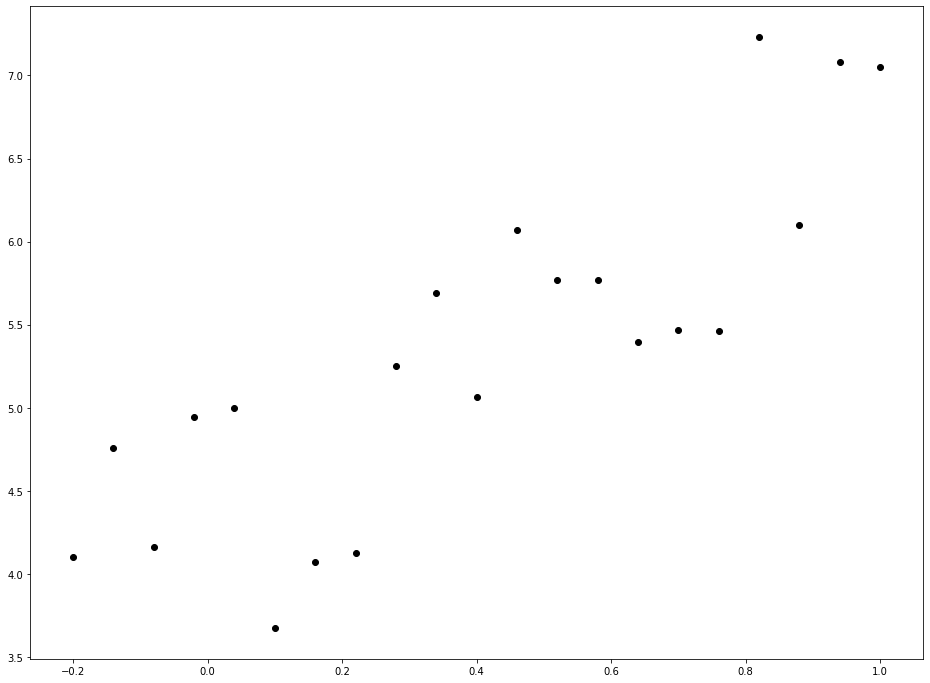

In [58]:
plt.figure(figsize=(16, 12))
plt.scatter(X_train, Y_train, color='black', label='train_data')
x_points = np.arange(-0.35, 1.25, 0.01)

X_train = data_train[:,0]
Y_train = data_train[:,1]

def upgrade(X, Y_train):
    tmp1 = np.dot(X.transpose(), X)
    tmp2 = sla.inv(tmp1)
    tmp3 = np.dot(tmp2, X.transpose())
    a = np.dot(tmp3,Y_train)
for k in range(6, 7):
    if k != 5:
        X = np.array(X_train ** k)
        for i in range(k - 1, -1, -1):
            pol_c = np.array(X_train ** i)
            X = np.column_stack((X, pol_c))
        res = upgrade(X, Y_train)
        res2 = L2_upgrade(X, 1.6)
        y = []
        for i in x_points:
            pol_c = 0
            tmp = 0
            for j in range(k + 1):
                tmp = (i ** (k - j))
                pol_c += res[j] * tmp
            y.append(pol_c)
        plt.plot(x_points, y, label='old_degree of poly = ' + str(j))
        z = []
        for i in x_points:
            pol_c = 0
            temp = 0
            for j in range(k + 1):
                tmp = (i ** (k - j))
                pol_c += res2[j] * tmp
            z.append(pol_c)
        plt.plot(x_points, z, label='new_degree of poly = ' + str(j))
ylim(2, 9)
plt.legend()
plt.grid()
plt.show()

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

In [ ]:
Пусть 
A = X_t^T*X_t
A(i,j)=Сумма(от n = 1 до t)x(n,i)*x(n,j)
B = X(t+1)^T*X(t+1)
B(i,j)=Сумма(от n = 1 до t+1)x(n,i)*x(n,j)
то есть матрицы  A и B всего лишь отличаются на x(t+1,i)*x(t+1,j)

Операции не зависят от t, т.к. размер матрицы X_t^T X_t не зависит от t.То есть кол-во элементов не зависит от t,
а от того и кол-во сумм(при умножении матриц).Значит и сложность не завивист от t

Теперь рассмотрим
A_t = X^T*y_t
A_i=Сумма(от n = 1 до t)x(n,i)*y_n
B = X(t+1)^T*y(t+1)
B_i=Сумма(от n = 1 до t+1)x(n,i)*y_n
то есть матрицы A и B всего лишь отличаются на x(t+1,i)*y(t+1,j)

Операции не зависят от t, т.к. размер матрицы X_t^T X_t не зависит от t.То есть кол-во элементов не зависит от t,
а от того и кол-во сумм(при умножении матриц).Значит и сложность не завивист от t

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

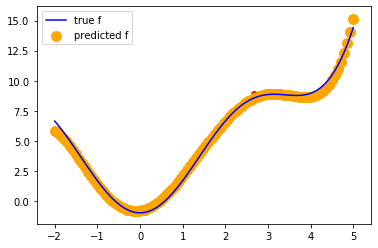

In [179]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(x) + x**2 - 1 # функция как в задании. исправил ошибку. заменил sin(5*x) на sin(x)

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

X_TX = np.dot(x_grid_enl.T, x_grid_enl)
X_Ty = np.dot(x_grid_enl.T, y_grid)

for i in range(250):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    # your code goes here
    
    tmp_pol = [x_new**j for j in range(6)]
    for j in range(len(X_TX)):
        for k in range(len(X_TX)):
            X_TX[j][k] += tmp_pol[j] * tmp_pol[k]
    
    for j in range(len(XTy)):
        X_Ty[j] += tmp_pol[j] * y_new
    
    coeffs = np.dot(np.linalg.inv(X_TX), X_Ty)
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid, y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        # your code goes here
        
        y_pred = []
        for x in x_grid:
            tmp = 0
            for k in range(6):
                temp = (x ** k) 
                tmp += coeffs[k] * temp 
            y_pred.append(tmp)
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.